In [5]:
import pandas as pd 
import matplotlib as plt

In [6]:
'''ELiminar columnes amb informació no necessària'''

df = pd.read_json("data/datathon_participants.json")

json_file = 'data/datathon_participants.json'
df = pd.read_json(json_file)

columns_to_remove = [ 
    'email', 
    'age', 
    'year_of_study', 
    'shirt_size', 
    'university', 
    'dietary_restrictions',
    'interests',
    'introduction',
    'technical_project',
    'future_excitement',
    'fun_fact',
    'availability',
    'preferred_role',
]

df_filtered = df.drop(columns=columns_to_remove)
csv_file = 'filtered_datathon_participants.csv'
df_filtered.to_csv(csv_file, index=False)

df_filtered.head()

,id,name,experience_level,hackathons_done,objective,preferred_languages,friend_registration,preferred_team_size,programming_skills,interest_in_challenges
0,2ebad15c-c0ef-4c04-ba98-c5d98403a90c,Sara Vilar,Intermediate,2,I'm super stoked to be participating in this d...,"[English, Catalan]",[],4,"{'Data Visualization': 2, 'Flask': 4, 'React N...","[Mango Challenge, Restb.ai Challenge, AED Chal..."
1,a00428a2-14a2-4fb1-838a-22394778ec88,Aurora Wells,Intermediate,5,"For me, this datathon is all about leveling up...",[English],[],3,"{'React': 4, 'PostgreSQL': 5, 'Figma': 7, 'SQL...","[AED Challenge, Mango Challenge, Restb.ai Chal..."
2,ab4b5790-0e6b-43db-bbaa-8670554f0cc8,Anaïs Giacomo,Intermediate,2,"Hey! I'm Anaïs, and I'm all about growth and l...","[English, Spanish, French, German, Italian]",[],4,"{'PostgreSQL': 4, 'TensorFlow': 5, 'Computer V...","[Restb.ai Challenge, Mango Challenge, AED Chal..."
3,cda2fafe-4b1e-4581-9fe0-1fb6d3e79aa3,Luna Solà.,Intermediate,2,I'm all about leveling up my skills at this da...,"[English, Catalan]","[13a8194a-79a9-4004-8711-e6d89efa0014, 2a4877f...",4,"{'IoT': 4, 'HTML/CSS': 6, 'MongoDB': 5, 'Block...","[Restb.ai Challenge, AED Challenge, Mango Chal..."
4,624f4677-d31a-4ecf-a7de-5df7392f9579,Evelyn Winters,Intermediate,2,I'm coming to this datathon to put my skills t...,[English],[],4,"{'iOS Development': 2, 'Flask': 6, 'TensorFlow...","[Restb.ai Challenge, AED Challenge, Mango Chal..."


In [7]:
'''Gràfic amb la distribució de grups segons preferència'''

import altair as alt

df_filtered_no_zero = df_filtered[df_filtered['preferred_team_size'] != 0]

bar = alt.Chart(df_filtered_no_zero).mark_bar().encode(
    x=alt.X('preferred_team_size:O', title='Preferred Team Size'),
    y=alt.Y('count()', title='Count')
).properties(
    title='Preferred Team Size Distribution', width = 500
)

bar


alt.Chart(...)

In [8]:
'''Gràfic amb la distribució de hackathons fetes'''

import altair as alt

df_filtered_no_zero = df_filtered[df_filtered['preferred_team_size'] != 0]

# Create the bar chart
bar = alt.Chart(df_filtered_no_zero).mark_bar().encode(
    x=alt.X('hackathons_done:O', title='hackathons done size', axis=alt.Axis(labelAngle=90)),
    y=alt.Y('count()', title='Count')
).properties(
    title='Hackathons done size Distribution', width = 500
)

bar

alt.Chart(...)

In [9]:
'''Gràfic amb la distribució del nivell d'experiència programant'''

import altair as alt

df_filtered_no_zero = df_filtered[df_filtered['preferred_team_size'] != 0]

# Create the bar chart
bar = alt.Chart(df_filtered_no_zero).mark_bar().encode(
    x=alt.X('experience_level:O', title='experience_level', axis=alt.Axis(labelAngle=90)),
    y=alt.Y('count()', title='Count')
).properties(
    title='Experience level Distribution', width = 500
)

bar

alt.Chart(...)

In [10]:
'''Separa els participants que volen anar sols'''

df_classifed = df_filtered_no_zero[df_filtered_no_zero['preferred_team_size'] == 1]
df_filtered_no_zero = df_filtered_no_zero[df_filtered_no_zero['preferred_team_size'] != 1]
df_classifed 

,id,name,experience_level,hackathons_done,objective,preferred_languages,friend_registration,preferred_team_size,programming_skills,interest_in_challenges
51,391f301c-f957-4825-b8a5-8c4a8333b3fb,Sofía García Navarro,Intermediate,3,"Hey! I'm Sofía, and for this datathon, my goal...",[Spanish],[],1,"{'C++': 6, 'Natural Language Processing': 2, '...","[Restb.ai Challenge, Mango Challenge, AED Chal..."
61,0bd85721-4cf5-46c0-87d3-67ea1dfe1964,Sophia Léa Langham,Beginner,1,"Hey there! So, I'm Sophia and I'm stoked to be...","[English, Spanish, French]",[cd42cf34-33e2-4ebc-b9b0-b0e7ca02886c],1,"{'UI/UX Design': 3, 'Data Analysis': 1, 'Block...","[Mango Challenge, Restb.ai Challenge, AED Chal..."
289,e51c17b6-2f8e-472f-a42e-beafe439e376,Pilar Cristina Fletcher,Intermediate,3,"Hey there! As a participant, I'm all about hav...","[English, Catalan, Spanish]",[2714f037-8b93-4606-8be1-6d90f0a1a370],1,"{'Data Analysis': 4, 'Android Development': 3,...","[AED Challenge, Mango Challenge, Restb.ai Chal..."
564,661b584b-1122-4113-b1fc-7cda2935a700,Aurélia Rodriguez-López,Intermediate,4,My main objective for this datathon is to take...,[],[2ded8b20-346e-4d31-9a5c-11e0b1e7a98b],1,"{'Data Analysis': 4, 'AWS/Azure/GCP': 6, 'SQL'...","[Mango Challenge, Restb.ai Challenge, AED Chal..."
619,f8464b68-156d-433b-85a9-19e5d39ce48a,Nina Hartmann,Intermediate,3,"Hey! As Nina, I'm all about having a blast at ...","[Catalan, German]",[e136439c-1902-442f-9225-504b049a8eb6],1,"{'AWS/Azure/GCP': 2, 'Blockchain': 6, 'Docker'...","[Restb.ai Challenge, Mango Challenge, AED Chal..."
810,890d188e-519c-4b67-a5bb-f473a23a9dbb,Louna Marcelle Rousseau,Intermediate,1,Hey! As a 19-year-old computer science student...,[French],[fcbd26d3-6334-4ef1-9ef5-2a05121547f7],1,"{'MongoDB': 3, 'Figma': 6, 'Data Visualization...","[Restb.ai Challenge, AED Challenge, Mango Chal..."


In [11]:
'''Substitueix el nivell d'experiència per números (1, 2, 3)'''

df_filtered_no_zero['experience_level'] = df_filtered_no_zero['experience_level'].map({'Beginner': 1, 'Intermediate': 2, 'Advanced': 3})
df_filtered_no_zero

C:\Users\claudia\AppData\Local\Temp\ipykernel_26744\195129510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zero['experience_level'] = df_filtered_no_zero['experience_level'].map({'Beginner': 1, 'Intermediate': 2, 'Advanced': 3})


,id,name,experience_level,hackathons_done,objective,preferred_languages,friend_registration,preferred_team_size,programming_skills,interest_in_challenges
0,2ebad15c-c0ef-4c04-ba98-c5d98403a90c,Sara Vilar,2,2,I'm super stoked to be participating in this d...,"[English, Catalan]",[],4,"{'Data Visualization': 2, 'Flask': 4, 'React N...","[Mango Challenge, Restb.ai Challenge, AED Chal..."
1,a00428a2-14a2-4fb1-838a-22394778ec88,Aurora Wells,2,5,"For me, this datathon is all about leveling up...",[English],[],3,"{'React': 4, 'PostgreSQL': 5, 'Figma': 7, 'SQL...","[AED Challenge, Mango Challenge, Restb.ai Chal..."
2,ab4b5790-0e6b-43db-bbaa-8670554f0cc8,Anaïs Giacomo,2,2,"Hey! I'm Anaïs, and I'm all about growth and l...","[English, Spanish, French, German, Italian]",[],4,"{'PostgreSQL': 4, 'TensorFlow': 5, 'Computer V...","[Restb.ai Challenge, Mango Challenge, AED Chal..."
3,cda2fafe-4b1e-4581-9fe0-1fb6d3e79aa3,Luna Solà.,2,2,I'm all about leveling up my skills at this da...,"[English, Catalan]","[13a8194a-79a9-4004-8711-e6d89efa0014, 2a4877f...",4,"{'IoT': 4, 'HTML/CSS': 6, 'MongoDB': 5, 'Block...","[Restb.ai Challenge, AED Challenge, Mango Chal..."
4,624f4677-d31a-4ecf-a7de-5df7392f9579,Evelyn Winters,2,2,I'm coming to this datathon to put my skills t...,[English],[],4,"{'iOS Development': 2, 'Flask': 6, 'TensorFlow...","[Restb.ai Challenge, AED Challenge, Mango Chal..."
...,...,...,...,...,...,...,...,...,...,...
919,522025a1-ffea-4cd9-8836-04bc06770a6f,Solène Maricela Rodríguez,2,4,"Hey there! I'm Solène, and I'm all about bring...","[Spanish, French]",[],4,"{'JavaScript': 3, 'Figma': 2, 'HTML/CSS': 3, '...","[AED Challenge, Mango Challenge, Restb.ai Chal..."
920,8d396cd8-3bc0-4097-94d3-50d34a692b92,Lena Rosemond,1,1,I'm all about winning this datathon! I'm looki...,"[English, Spanish, French]",[],4,"{'Figma': 1, 'TypeScript': 1}","[Restb.ai Challenge, AED Challenge, Mango Chal..."
921,9e034cf8-caeb-4230-b5d4-756083080541,Rosa Pujol Estivill,2,4,"Hey, I'm Rosa! For this datathon, my objective...",[Catalan],[],4,"{'MongoDB': 2, 'AWS/Azure/GCP': 3, 'Natural La...","[Restb.ai Challenge, Mango Challenge, AED Chal..."
922,5c2e3284-8a4a-4c66-af74-c693515be182,Rebecca Jane Wilson,1,1,"For me, datathon is an opportunity to grow and...",[English],[],4,"{'UI/UX Design': 3, 'Figma': 2, 'React': 4}","[Mango Challenge, Restb.ai Challenge, AED Chal..."


c:\Users\claudia\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\claudia\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


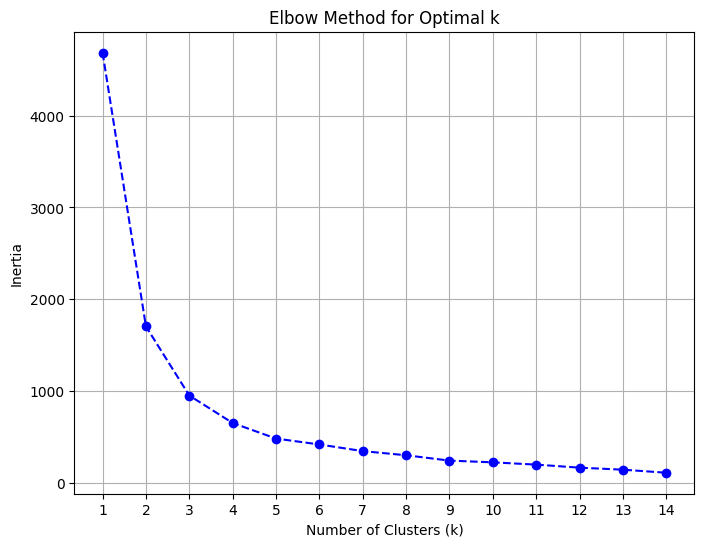

In [12]:
'''Gràfic per calcular el nombre de clusters pertinents'''

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_numeric = df_filtered_no_zero[['experience_level', 'hackathons_done', 'preferred_team_size']]

k_range = range(1, 15)

inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [13]:
'''Agrupació de participants en 4 clusters segons 3 característiques'''

from sklearn.cluster import KMeans

df_numeric = df_filtered_no_zero[['experience_level', 'hackathons_done', 'preferred_team_size']]


kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_numeric)

print("Cluster Centers:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)

Cluster Centers: [[1.6255814  1.32093023 3.86046512]
 [2.28484848 5.16969697 3.81818182]
 [3.         8.23880597 3.85074627]
 [2.10629921 3.57086614 3.85826772]]
Labels: [0 1 0 0 0 3 3 1 1 1 0 0 0 0 1 0 0 1 3 0 3 2 1 0 1 3 2 1 1 1 1 3 0 0 0 2 0
 0 1 3 0 3 0 1 0 0 1 0 3 0 1 1 1 0 1 0 0 3 1 0 0 0 1 0 1 0 0 0 0 0 3 1 0 0
 3 0 2 3 1 0 1 0 0 3 3 2 0 0 3 0 3 3 0 0 1 3 1 3 3 1 3 0 3 0 0 3 2 3 0 1 1
 3 0 3 0 0 0 3 0 0 3 3 0 0 0 3 3 0 3 3 0 3 2 0 0 3 3 0 0 3 0 0 3 0 0 0 1 3
 3 0 0 0 3 1 2 0 0 1 1 1 0 2 0 0 3 3 3 3 0 0 0 1 2 2 1 1 0 2 0 0 0 1 3 3 1
 0 0 0 3 3 3 0 0 0 0 1 3 1 3 1 1 1 0 0 0 3 0 0 0 3 1 3 0 3 0 1 2 3 3 0 0 0
 3 2 1 0 3 0 0 0 0 2 0 3 1 1 0 2 3 3 0 0 1 2 0 0 0 0 1 3 0 0 0 0 0 3 0 0 1
 3 0 3 1 3 3 3 0 3 0 3 3 0 1 0 3 3 3 0 0 0 0 1 0 0 0 1 0 0 3 3 0 2 0 3 3 3
 3 3 0 1 0 0 0 1 3 0 1 0 3 2 0 0 3 1 3 0 1 0 3 0 3 3 1 2 0 0 1 1 0 3 0 1 1
 3 1 1 0 0 1 1 0 1 3 0 0 3 3 0 2 3 0 0 1 0 2 2 3 1 0 1 0 3 3 0 2 3 0 3 3 0
 1 0 1 0 0 1 3 0 3 3 3 0 0 0 0 2 1 3 1 3 0 0 1 3 2 0 3 0 3 0 1 3 3 3 3 0 2
 0 0 

In [14]:
'''Classificació dels participants en 4 clusters i segons mida de l'equip que volen'''

df_filtered_no_zero['cluster'] = kmeans.fit_predict(df_numeric)

grouped = df_filtered_no_zero.groupby(['cluster', 'preferred_team_size']).apply(lambda group: group['name'].tolist())
grouped

C:\Users\claudia\AppData\Local\Temp\ipykernel_26744\583817866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zero['cluster'] = kmeans.fit_predict(df_numeric)
C:\Users\claudia\AppData\Local\Temp\ipykernel_26744\583817866.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_filtered_no_zero.groupby(['cluster', 'preferred_team_size']).apply(lambda group: group['name'].tolist())


cluster  preferred_team_size
0        2                      [Evelyn Wellesley, Ana Isabel Ramirez, Alejand...
         3                      [Sofía Elena Russell., Lucas Everett Bright, L...
         4                      [Sara Vilar, Anaïs Giacomo, Luna Solà., Evelyn...
1        2                       [Ruby Windsor., Sophia Estrada, Anaïs Jørgensen]
         3                      [Aurora Wells, Lluís Ferrante, Anna Isabelle K...
         4                      [Ana Isabel Serraño., Alessandra Pérez Olivei...
2        2                                       [Alessia Lane, Anaïs Pérez-Roca]
         3                      [Ashley Winston, River Paige Winchester, Sofia...
         4                      [Aurèlia Fleur Morelli, Emily Wilson, Gisella ...
3        2                      [Aurora Rodriguez, Sofía Delgado, Eva Sophia M...
         3                      [Emily May Winston, Anna Mariana Schneider, Ví...
         4                      [Emily Rachel Winston, Ruby Wynter, S